<a href="https://colab.research.google.com/github/urvihp1001/JPMorganQuant/blob/main/JPMC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import matplotlib.dates as mdates
from scipy.stats import norm
import datetime as dt

In [2]:
Loans_df=pd.read_csv('Loan_data.csv')

In [3]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [5]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


**Rating Map**

Creating a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score. The process of doing this is known as quantization. Creating six buckets for FICO scores ranging from 300 to 850.

In [6]:
d={range(800,851):1,range(750,800):2,range(700,750):3,range(650,700):4,range(600,650):5,range(300,600):6}

In [7]:
d #groups of fico score

{range(800, 851): 1,
 range(750, 800): 2,
 range(700, 750): 3,
 range(650, 700): 4,
 range(600, 650): 5,
 range(300, 600): 6}

In [8]:
Loans_df['Rating'] = Loans_df['fico_score'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))


In [9]:
Loans_df.groupby('fico_score')['default']

In [10]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5


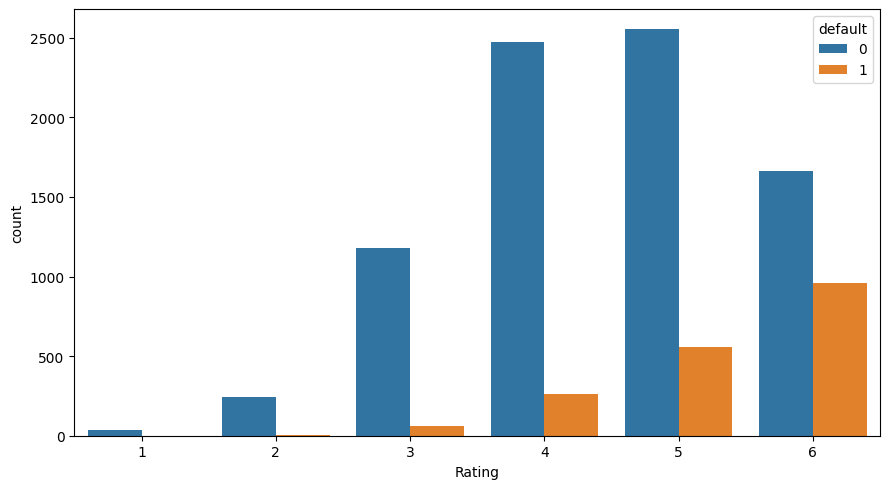

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['Rating'],hue=Loans_df['default'])
plt.tight_layout()

In [12]:
Loans_df.groupby('Rating')['default'].value_counts().sort_values()


,,count
Rating,default,
1,1,1
2,1,7
1,0,33
3,1,62
2,0,243
4,1,263
5,1,558
6,1,960
3,0,1182


In [13]:
Loans_df['ratio_income_Totdebt'] = Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt'] = Loans_df['income']/Loans_df['loan_amt_outstanding']
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,48.825030,15.485222


Predicting Prob of Default

In [14]:
Loans_df[['default','Rating']]

,default,Rating
0,0,5
1,1,6
2,0,5
3,0,5
4,0,5
...,...,...
9995,0,4
9996,0,5
9997,0,6
9998,0,5


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [16]:
X=Loans_df.drop(['default','fico_score','customer_id'],axis=1)
Y=Loans_df['default']
id_users=Loans_df['customer_id']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)


In [18]:
# Create, train, and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
lr_preds = clf_logistic.predict_proba(X_test)

In [20]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [21]:
print(pd.concat([true_df.reset_index(drop=True),lr_preds_df],axis=1))


      default    lr_pred_PD
0           0  2.044373e-01
1           0  9.964012e-09
2           0  1.450337e-12
3           0  3.162008e-07
4           0  1.325889e-06
...       ...           ...
6995        1  5.090289e-01
6996        0  1.286030e-09
6997        0  1.531421e-13
6998        0  7.606901e-11
6999        0  1.332800e-08

[7000 rows x 2 columns]


In [22]:
lr_preds_df['lr_pred_loan_status_60']=lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x>=0.6 else 0)
print("Non-default/default predictions at 60% threshold")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-default/default predictions at 60% threshold
lr_pred_loan_status_60
0    5766
1    1234
Name: count, dtype: int64


In [23]:
Y_test.value_counts()

,count
default,
0,5723
1,1277


In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,lr_preds_df['lr_pred_loan_status_60'])

array([[5716,    7],
       [  50, 1227]])

In [25]:
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test,lr_preds_df['lr_pred_loan_status_60'],target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      1.00      1.00      5723
     Default       0.99      0.96      0.98      1277

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [26]:
print(clf_logistic.score(X_test,Y_test))


0.9934285714285714


In [27]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

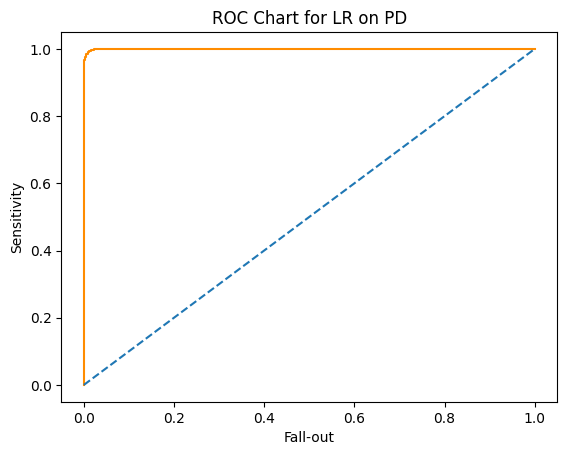

In [28]:
lr_prob_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

In [29]:
prob_to_default=clf_logistic.predict_proba(X)


In [30]:
prob_data=pd.DataFrame(prob_to_default[:,1][0:].round(decimals=2),columns=['prob_to_default'])

In [31]:
prob_data

,prob_to_default
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [32]:
X=pd.concat([id_users,X,Y,prob_data],axis=1)

In [33]:
X

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,Rating,ratio_income_Totdebt,ratio_income_loan_amt,default,prob_to_default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,5,19.931033,14.945650,0,0.0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,6,3.238454,13.603576,1,1.0
2,2256073,0,3363.009259,2027.830850,65866.71246,4,5,32.481364,19.585647,0,0.0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,5,29.722181,15.599407,0,0.0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,5,13.256433,17.422978,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,4,16.717341,14.072707,0,0.0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,5,14.651358,19.287238,0,0.0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,6,7.935166,12.367199,0,0.0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,5,48.825030,15.485222,0,0.0


**Predicting PD (Probability of Default) using new ratings**

In [34]:
X=Loans_df['Rating'].to_numpy().reshape(-1,1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)

In [36]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

In [39]:
lr_preds = clf_logistic.predict_proba(X_test)

In [40]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [41]:
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default  lr_pred_PD
0           0    0.372431
1           0    0.372431
2           0    0.092884
3           0    0.092884
4           0    0.017361
...       ...         ...
6995        1    0.197759
6996        0    0.092884
6997        0    0.197759
6998        0    0.092884
6999        0    0.197759

[7000 rows x 2 columns]


In [42]:
print(clf_logistic.score(X_test, Y_test))

0.8175714285714286


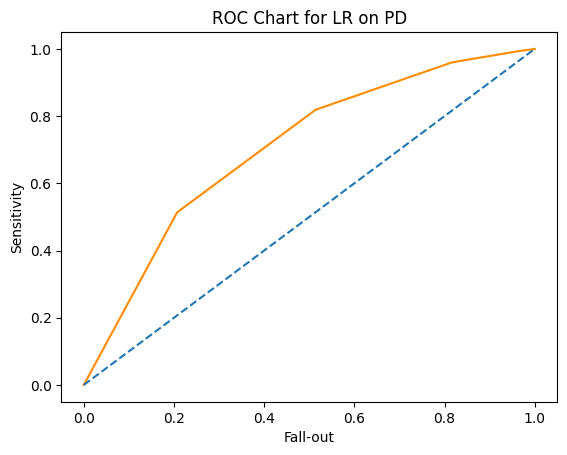

In [44]:
lr_preds_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_preds_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

Fitting the entire model to dataset

In [45]:
prob_to_default=clf_logistic.predict_proba(X)

In [47]:
prob_data = pd.DataFrame(prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])


In [48]:
X = pd.concat([Loans_df, prob_data], axis = 1)


In [49]:
X

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,19.931033,14.945650,0.20
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,3.238454,13.603576,0.37
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,32.481364,19.585647,0.20
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,29.722181,15.599407,0.20
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,13.256433,17.422978,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,16.717341,14.072707,0.09
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,14.651358,19.287238,0.20
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,7.935166,12.367199,0.37
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,48.825030,15.485222,0.20
